# SS Computer Assignment 2 
Mohammad Saadati - 
_810198410_

# Question 4

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from scipy import signal
from scipy import interpolate
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft, ifft , ifftshift

## Calculation of convolution in the frequency domain

Text(0.5, 1.0, 'Kernel')

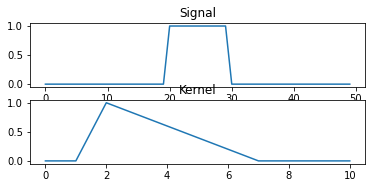

In [20]:
m = 50 
signal = np.zeros(m)
signal[range(int(m*.4),int(m*.6))] = 1
plt.subplot2grid((3,1),(0,0))
plt.plot(signal)
plt.title('Signal')

n = 11
kernel = np.zeros(n)
kernel[range(int(n*.25),int(n*.8))] = np.linspace(1,0,int(n*.55))
plt.subplot2grid((3,1),(1,0))
plt.plot(kernel)
plt.title('Kernel')

### A

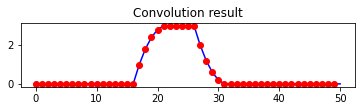

In [21]:
convres = np.real( scipy.fftpack.ifft( np.multiply(scipy.fftpack.fft(signal,m+n-1), scipy.fftpack.fft(kernel,m+n-1))))
convres = convres[range(int(np.floor(n/2)),int(len(convres)-np.floor(n/2)+1))]
plt.subplot2grid((3,1),(2,0))
plt.plot(convres,'b')
plt.title('Convolution result')
plt.plot(np.convolve(signal,kernel,mode='same'),'ro')
plt.show()

## Filter the signal in one dimension (Narrow band Temporal Filtering)

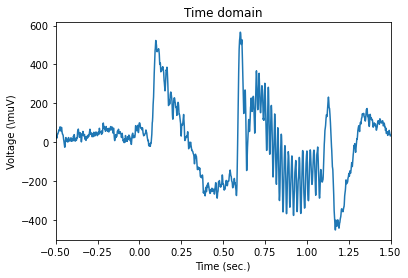

In [22]:
matdata = sio.loadmat('braindata.mat')
timevec = matdata['timevec']
srate = matdata['srate']
braindata = matdata['braindata']
timevec = timevec[0]
srate = srate[0]
braindata = braindata[0]

plt.plot(timevec,braindata)
plt.xlim([-.5,1.5])
plt.xlabel('Time (sec.)')
plt.ylabel('Voltage (\muV)')
plt.title('Time domain')
plt.show()

### A

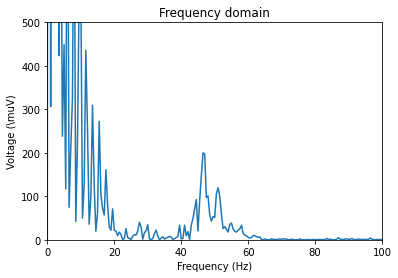

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


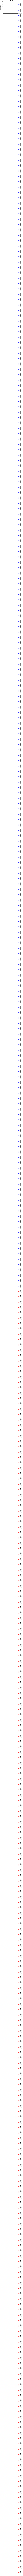

In [23]:
data_x = scipy.fftpack.fft(braindata)/len(timevec)
hz = np.linspace(0,srate,len(timevec))
ampspect = 2*np.abs(data_x)**2
plt.plot(hz,ampspect[0:len(hz)])
plt.xlim([0,100])
plt.ylim([0,500])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (\muV)')
plt.title('Frequency domain')
plt.show()
c = 'br'
peak_filt_freqs = [2,47] 
for f in range(0,len(peak_filt_freqs)):
    filtdat = 2*np.real(scipy.fftpack.ifft(np.multiply(data_x,np.exp(-((hz-peak_filt_freqs[f])/4)**2))))
    plt.plot(timevec,filtdat,c[f],label='%g Hz' %peak_filt_freqs[f])
    plt.xlim([-.5,1.5])
    plt.xlabel('Time (sec.)')
    plt.ylabel('Voltage (\muV)')
    plt.title('Time domain')
plt.legend()
plt.show()

### B

## Filter photos in two dimensions (Image Filtering 2D)

In [24]:
lenna = np.asarray(Image.open("Lenna.png"))
b_and_w = np.mean(lenna ,axis=2)

### Low Pass Filtering:

### A

Text(0.5, 1.0, 'Gray scale image')

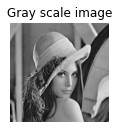

In [25]:
plt.subplot2grid((2,2),(0,0))
plt.imshow(b_and_w ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray scale image')

### B

#### 1

fft.fft2(a, s=None, axes=(- 2, - 1), norm=None)
* Compute the 2-dimensional discrete Fourier Transform.
* This function computes the n-dimensional discrete Fourier Transform over any axes in an M-dimensional array by means of the Fast Fourier Transform (FFT). By default, the transform is computed over the last two axes of the input array, i.e., a 2-dimensional FFT.

2D FFT (2-dimensional Fast Fourier Transform) can be used to analyze the frequency spectrum of 2D signal (matrix) data. Conversely, 2D IFFT (2-dimension Inverse Fast Fourier Transform) is able to reconstruct a 2D signal from a 2D frequency spectrum. OriginPro provides both for conversion between time and frequency domains in 2 dimensions, together with the 2D FFT filter to perform filtering on a 2D signal.

fft.fftshift(x, axes=None)

* Shift the zero-frequency component to the center of the spectrum.

* This function swaps half-spaces for all axes listed (defaults to all). Note that y[0] is the Nyquist component only if len(x) is even.

#### 2

In [26]:
img_x = scipy.fftpack.fftshift(scipy.fftpack.fft2(b_and_w))

#### 3

Text(0.5, 1.0, 'Amplitude spectrum')

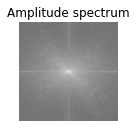

In [27]:
powr2 = np.log(np.abs(img_x))
plt.subplot2grid((2,3),(1,0))
plt.imshow(powr2,cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')

#### 4

Text(0.5, 1.0, 'Gain function')

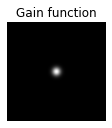

In [28]:
width = .1
lims = np.shape(b_and_w)
xr = stats.zscore(np.arange(lims[0]))
[x,y] = np.meshgrid(xr,xr)
gaus2d = np.exp(-(x**2 + y**2)/(2*width**2))
plt.subplot2grid((2,3),(1,1))
plt.imshow(gaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')

#### 5

Text(0.5, 1.0, 'Modulated spectrum')

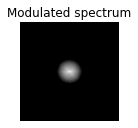

In [29]:
plt.subplot2grid((2,3),(1,2))
plt.imshow(np.log(np.abs(np.multiply(img_x, gaus2d))),cmap=plt.cm.gray)
plt.axis('off')
plt.clim([0,15])
plt.title('Modulated spectrum')

#### 6

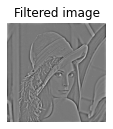

In [30]:
image_recon = np.real(scipy.fftpack.ifft2(ifftshift(np.multiply(img_x,gaus2d))))
plt.subplot2grid((2,2),(0,1))
plt.imshow(imgrecon ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Filtered image')
plt.show()

### High Pass Filtering:

### A

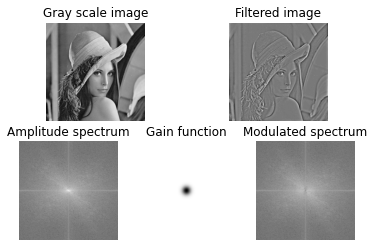

In [31]:
lenna = np.asarray(Image.open("Lenna.png"))
b_and_w = np.mean(lenna ,axis=2)

plt.subplot2grid((2,2),(0,0))
plt.imshow(b_and_w ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray scale image')

img_x  = scipy.fftpack.fftshift(scipy.fftpack.fft2(b_and_w))

powr2 = np.log(np.abs(img_x))
plt.subplot2grid((2,3),(1,0))
plt.imshow(powr2,cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')

width = .1
lims = np.shape(b_and_w)
xr = stats.zscore(np.arange(lims[0]))
[x,y] = np.meshgrid(xr,xr)
gaus2d = 1 - np.exp(-(x**2 + y**2)/(2*width**2))
plt.subplot2grid((2,3),(1,1))
plt.imshow(gaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')

plt.subplot2grid((2,3),(1,2))
plt.imshow(np.log(np.abs(np.multiply(img_x, gaus2d))),cmap=plt.cm.gray)
plt.axis('off')
plt.clim([0,15])
plt.title('Modulated spectrum')

image_recon = np.real(scipy.fftpack.ifft2(ifftshift(np.multiply(img_x,gaus2d))))
plt.subplot2grid((2,2),(0,1))
plt.imshow(imgrecon ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Filtered image')
plt.show()

### B

The parts of the image and face that are in the periphery and the edges are more visible because in this part the focus of the Gaussian filter is on preserving the separating parts.